In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Finance_data.csv")
print(df.head())
print(df.info())



   gender  age Investment_Avenues  Mutual_Funds  Equity_Market  Debentures  \
0  Female   34                Yes             1              2           5   
1  Female   23                Yes             4              3           2   
2    Male   30                Yes             3              6           4   
3    Male   22                Yes             2              1           3   
4  Female   24                 No             2              1           3   

   Government_Bonds  Fixed_Deposits  PPF  Gold  ...           Duration  \
0                 3               7    6     4  ...          1-3 years   
1                 1               5    6     7  ...  More than 5 years   
2                 2               5    1     7  ...          3-5 years   
3                 7               6    4     5  ...   Less than 1 year   
4                 6               4    5     7  ...   Less than 1 year   

  Invest_Monitor   Expect       Avenue What are your savings objectives?  \
0        M

**How many men and how many females!!!!**

In [2]:
gender_counts = df['gender'].value_counts()
print(gender_counts)

gender
Male      25
Female    15
Name: count, dtype: int64


Colorful histogramme of how many men and females

C:\Users\abuba\AppData\Local\Temp\ipykernel_35688\3677355970.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='Set2')


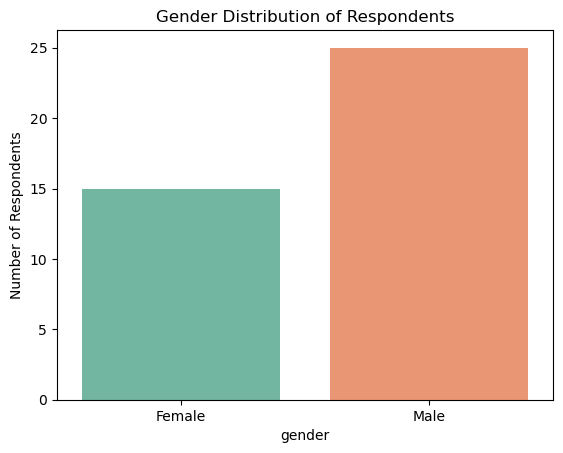

In [3]:
sns.countplot(data=df, x='gender', palette='Set2')
plt.title('Gender Distribution of Respondents')
plt.ylabel('Number of Respondents')
plt.savefig('Gender Disribution of Respondents')
plt.show()

Histogramme of people in diffrent age ranges male and female

In [4]:
# Example age ranges
bins = [0, 25, 35, 45, 60, 100]        # Upper bounds for each group
labels = ['18-25','26-35','36-45','46-60','60+']

df['AGE_GROUP'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)


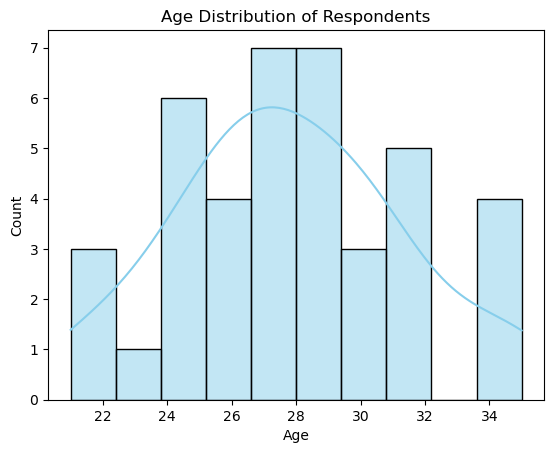

In [5]:
# Histogram
sns.histplot(df['age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('Age Distribution of Respondents')
plt.show()

Not very Interseting because at a glance but alot more people 26-45

C:\Users\abuba\AppData\Local\Temp\ipykernel_35688\3878757363.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='AGE_GROUP', palette='Set3', order=["18-25","26-35","36-45","46-60","60+"])


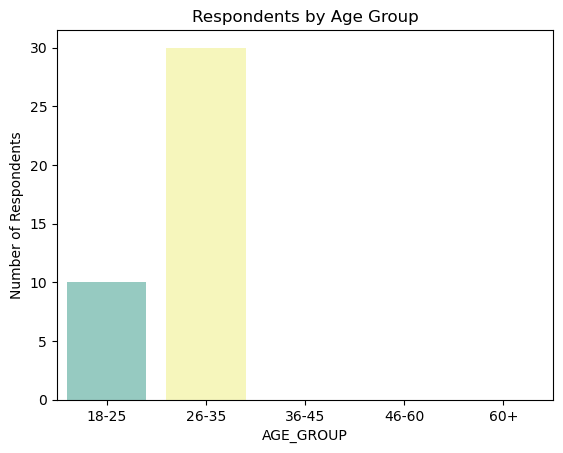

In [6]:
sns.countplot(data=df, x='AGE_GROUP', palette='Set3', order=["18-25","26-35","36-45","46-60","60+"])
plt.title('Respondents by Age Group')
plt.ylabel('Number of Respondents')
plt.savefig('Respondents by Age Group')
plt.show()


gender     Female  Male
AGE_GROUP              
18-25           6     4
26-35           9    21


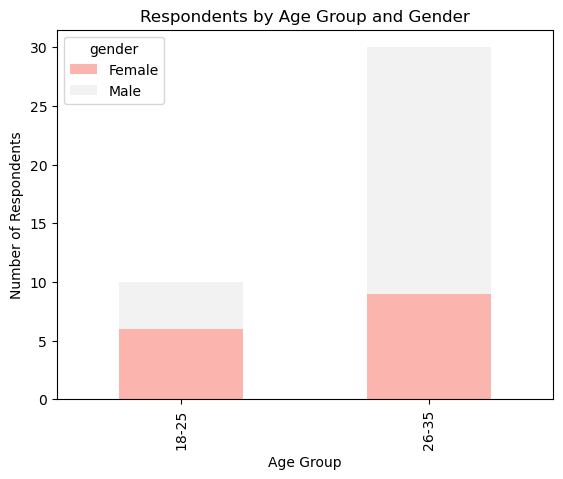

In [7]:
age_gender_crosstab = pd.crosstab(df['AGE_GROUP'], df['gender'])
print(age_gender_crosstab)

# Stacked bar chart
age_gender_crosstab.plot(kind='bar', stacked=True, colormap='Pastel1')
plt.title('Respondents by Age Group and Gender')
plt.ylabel('Number of Respondents')
plt.xlabel('Age Group')
plt.savefig('Respondents by Age Group and Gender')
plt.show()

In [8]:
gender_percent = df['gender'].value_counts(normalize=True) * 100
print(gender_percent)


gender
Male      62.5
Female    37.5
Name: proportion, dtype: float64


In [9]:
avg_age_gender = df.groupby('gender')['age'].mean()
print(avg_age_gender)


gender
Female    27.733333
Male      27.840000
Name: age, dtype: float64


Investment_Avenues
Yes    37
No      3
Name: count, dtype: int64


C:\Users\abuba\AppData\Local\Temp\ipykernel_35688\3308808159.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Investment_Avenues', palette='Set2')


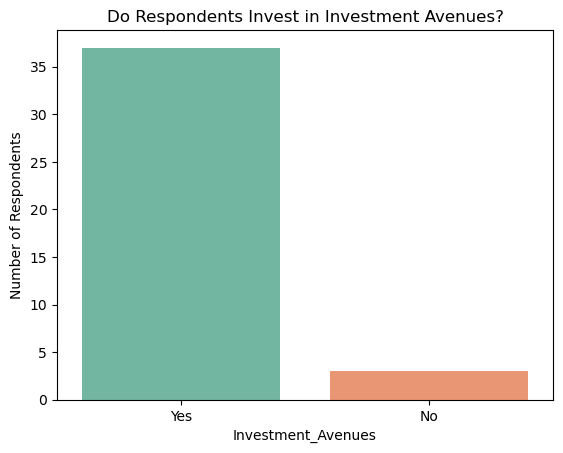

In [10]:
# Count of Yes/No
invest_counts = df['Investment_Avenues'].value_counts()
print(invest_counts)

# Bar chart
sns.countplot(data=df, x='Investment_Avenues', palette='Set2')
plt.title('Do Respondents Invest in Investment Avenues?')
plt.ylabel('Number of Respondents')
plt.savefig('Investment Avenues Participation')
plt.show()



Stock_Marktet
Yes    35
No      5
Name: count, dtype: int64


C:\Users\abuba\AppData\Local\Temp\ipykernel_35688\3169606949.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Stock_Marktet', palette='Set1')


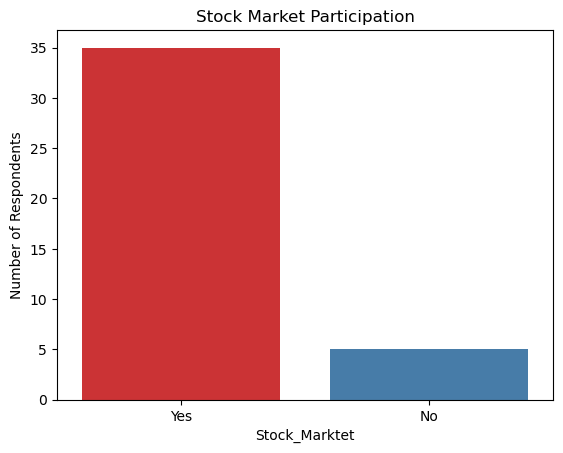

In [11]:
stock_counts = df['Stock_Marktet'].value_counts()
print(stock_counts)

sns.countplot(data=df, x='Stock_Marktet', palette='Set1')
plt.title('Stock Market Participation')
plt.ylabel('Number of Respondents')
plt.savefig('Stock Market Participation')
plt.show()


Investment_Avenues  No  Yes
gender                     
Female               3   12
Male                 0   25


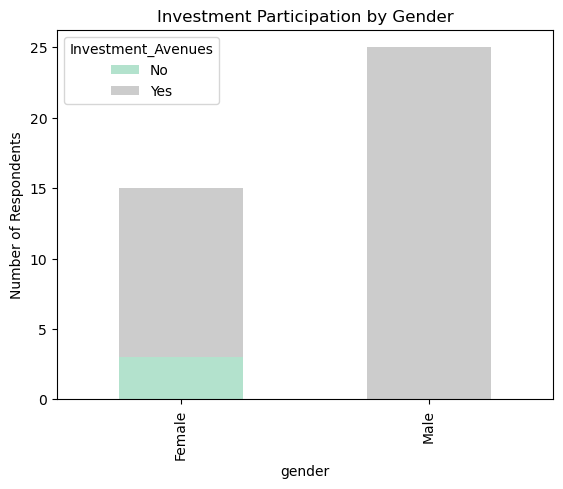

In [12]:
invest_gender = pd.crosstab(df['gender'], df['Investment_Avenues'])
print(invest_gender)

invest_gender.plot(kind='bar', stacked=True, colormap='Pastel2')
plt.title('Investment Participation by Gender')
plt.ylabel('Number of Respondents')
plt.savefig('Investment Participation by Gender')
plt.show()


Investment_Avenues  No  Yes
AGE_GROUP                  
18-25                3    7
26-35                0   30


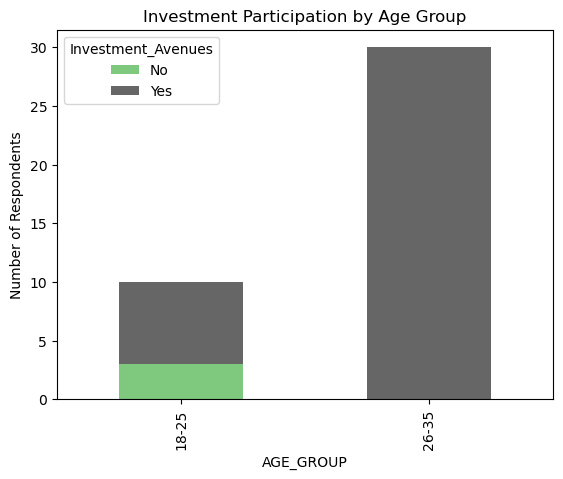

In [13]:
invest_age = pd.crosstab(df['AGE_GROUP'], df['Investment_Avenues'])
print(invest_age)

invest_age.plot(kind='bar', stacked=True, colormap='Accent')
plt.title('Investment Participation by Age Group')
plt.ylabel('Number of Respondents')
plt.savefig('Investment Participation by Age Group')    
plt.show()


PPF                 2.025
Mutual_Funds        2.550
Equity_Market       3.475
Fixed_Deposits      3.575
Government_Bonds    4.650
Debentures          5.750
Gold                5.975
dtype: float64


C:\Users\abuba\AppData\Local\Temp\ipykernel_35688\3995561154.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ranks.values, y=avg_ranks.index, palette="Blues_r")


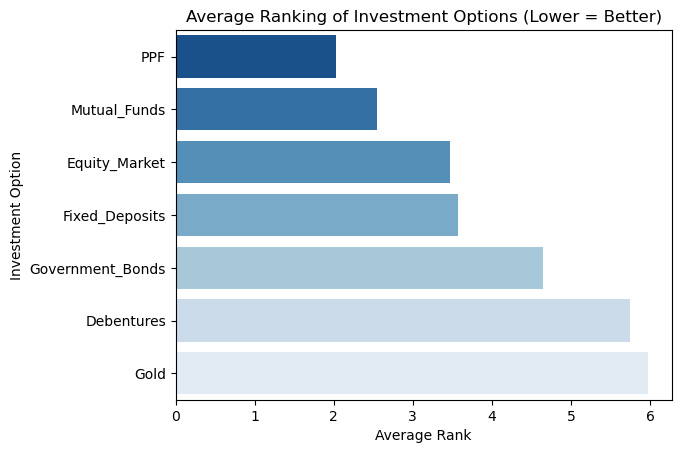

In [14]:
ranking_cols = [
    'Mutual_Funds','Equity_Market','Debentures','Government_Bonds','Fixed_Deposits','PPF','Gold']
# Calculate mean ranking for each option
avg_ranks = df[ranking_cols].mean().sort_values()
print(avg_ranks)

# Bar chart
sns.barplot(x=avg_ranks.values, y=avg_ranks.index, palette="Blues_r")
plt.title("Average Ranking of Investment Options (Lower = Better)")
plt.xlabel("Average Rank")
plt.ylabel("Investment Option")
plt.savefig('Average Ranking of Investment Options')
plt.show()


C:\Users\abuba\AppData\Local\Temp\ipykernel_35688\267655320.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_ranks.index, x=avg_ranks.values, palette="RdYlGn_r")


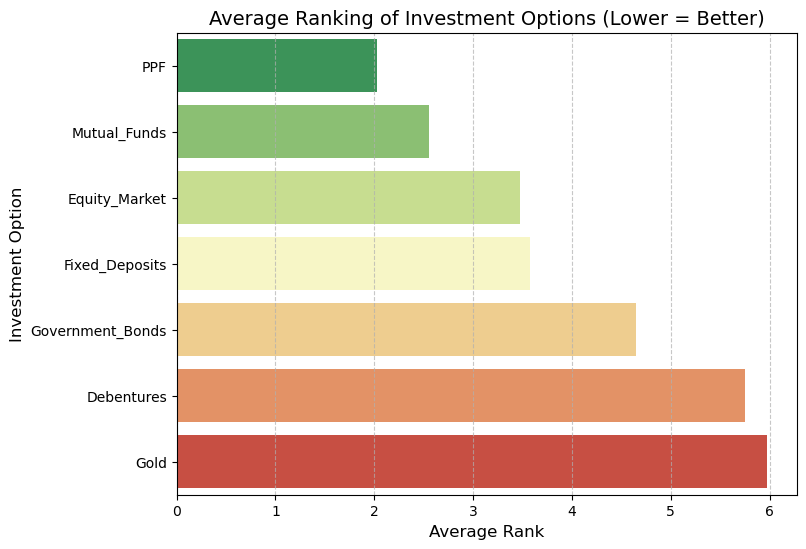

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(y=avg_ranks.index, x=avg_ranks.values, palette="RdYlGn_r")  
plt.title("Average Ranking of Investment Options (Lower = Better)", fontsize=14)
plt.xlabel("Average Rank", fontsize=12)
plt.ylabel("Investment Option", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('Average Ranking of Investment Options Enhanced')
plt.show()


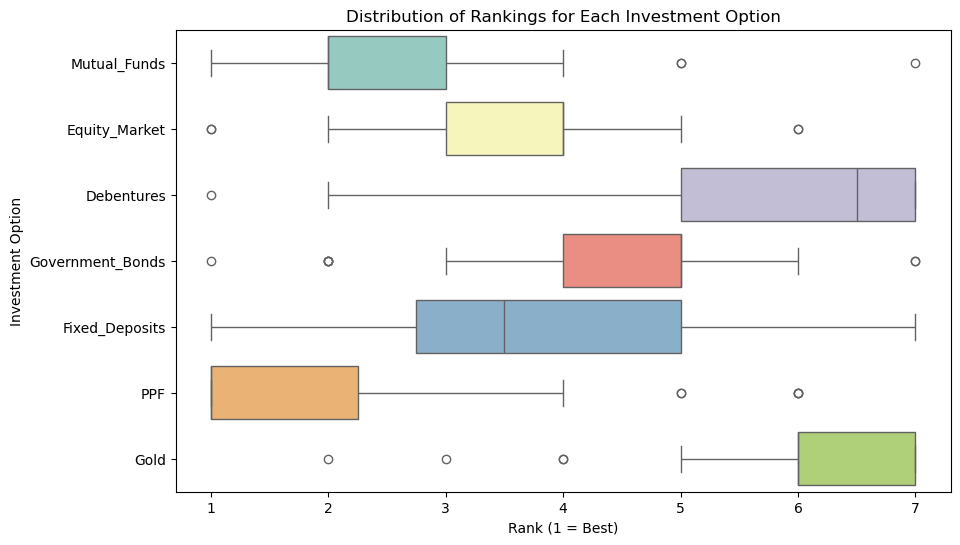

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[ranking_cols], orient="h", palette="Set3")
plt.title("Distribution of Rankings for Each Investment Option")
plt.xlabel("Rank (1 = Best)")
plt.ylabel("Investment Option")
plt.show()


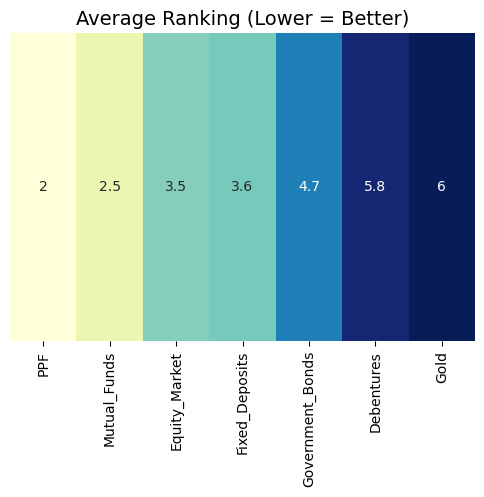

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(avg_ranks.to_frame().T, annot=True, cmap="YlGnBu", cbar=False)
plt.title("Average Ranking (Lower = Better)", fontsize=14)
plt.yticks([])
plt.savefig('Average Ranking of Investment Options Heatmap')
plt.show()


Top_Choice
PPF                 24
Fixed_Deposits       8
Mutual_Funds         4
Equity_Market        2
Government_Bonds     1
Debentures           1
Name: count, dtype: int64


C:\Users\abuba\AppData\Local\Temp\ipykernel_35688\1805316682.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Top_Choice', data=df, order=top_choice_counts.index, palette="viridis")


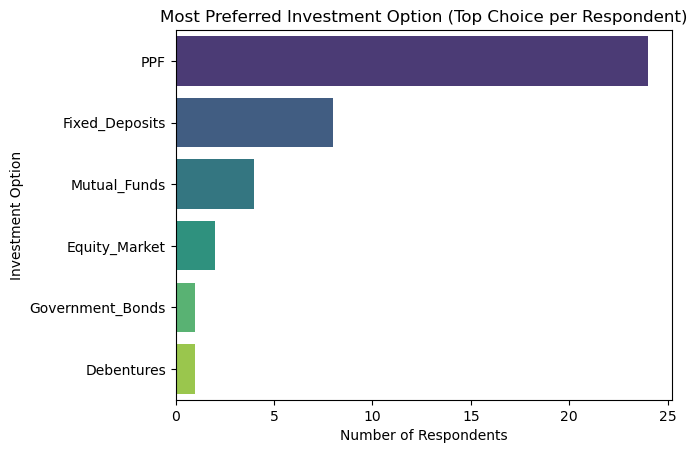

In [18]:
# Find the option with the lowest rank for each respondent
df['Top_Choice'] = df[ranking_cols].idxmin(axis=1)

top_choice_counts = df['Top_Choice'].value_counts()
print(top_choice_counts)

# Plot
sns.countplot(y='Top_Choice', data=df, order=top_choice_counts.index, palette="viridis")
plt.title("Most Preferred Investment Option (Top Choice per Respondent)")
plt.xlabel("Number of Respondents")
plt.ylabel("Investment Option")
plt.savefig('Most Preferred Investment Option')
plt.show()
#Insight: Which investment avenue is the #1 choice for most people?

C:\Users\abuba\AppData\Local\Temp\ipykernel_35688\3493859363.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_choice_counts.index, x=top_choice_counts.values, palette="viridis")


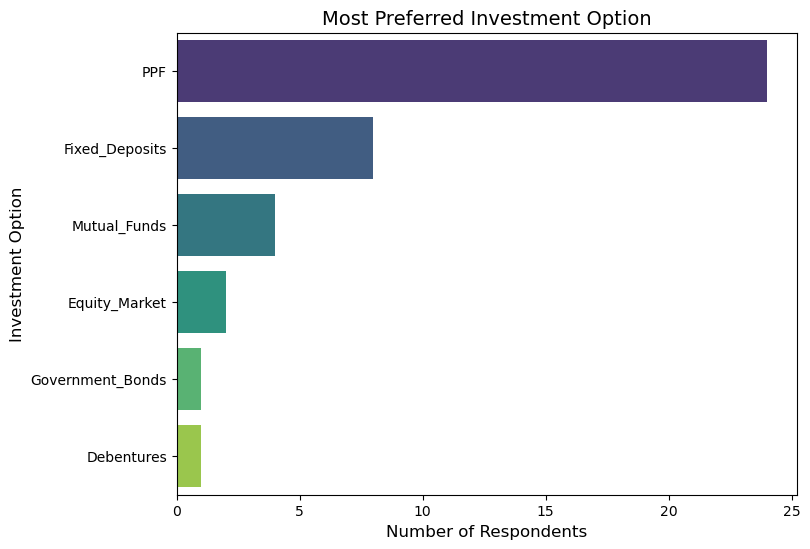

In [19]:
top_choice_counts = df['Top_Choice'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(y=top_choice_counts.index, x=top_choice_counts.values, palette="viridis")
plt.title("Most Preferred Investment Option", fontsize=14)
plt.xlabel("Number of Respondents", fontsize=12)
plt.ylabel("Investment Option", fontsize=12)
plt.show()
#A majority of respondents (over 60%) selected Public Provident Fund (PPF) as their most preferred investment avenue, indicating a strong bias toward secure, government-backed investments. In contrast, riskier options like Equity Markets and Debentures were rarely the top choice."

Top_Choice  Debentures  Equity_Market  Fixed_Deposits  Government_Bonds  \
gender                                                                    
Female               0              1               1                 1   
Male                 1              1               7                 0   

Top_Choice  Mutual_Funds  PPF  
gender                         
Female                 2   10  
Male                   2   14  


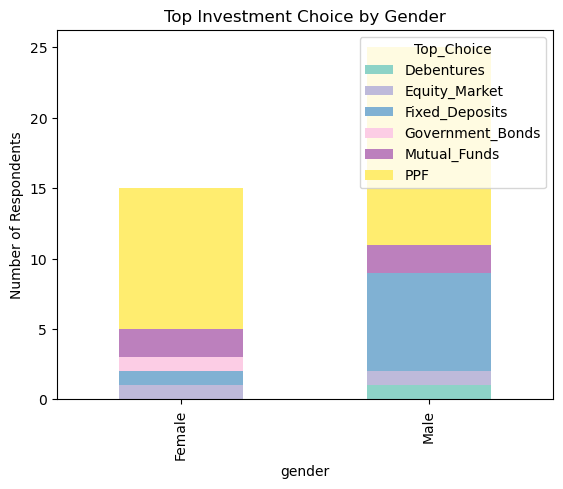

In [20]:
choice_gender = pd.crosstab(df['gender'], df['Top_Choice'])
print(choice_gender)

choice_gender.plot(kind='bar', stacked=True, colormap='Set3')
plt.title("Top Investment Choice by Gender")
plt.ylabel("Number of Respondents")
plt.savefig('Top Investment Choice by Gender')
plt.show()


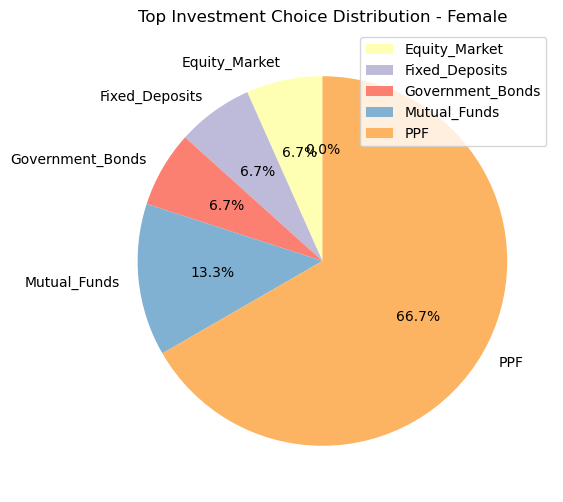

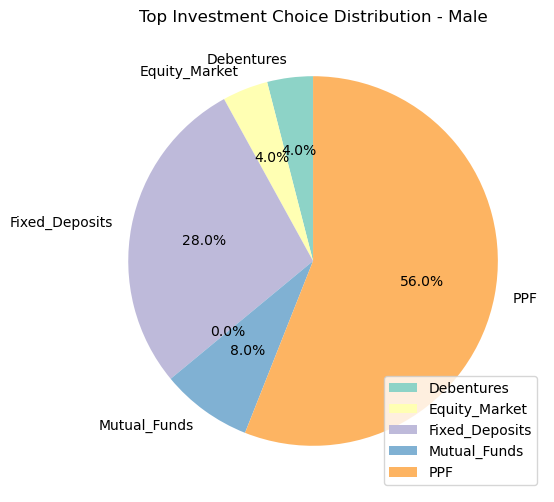

In [21]:
import matplotlib.pyplot as plt

# Group counts by Gender and Top Choice
choice_gender = df.groupby(['gender', 'Top_Choice']).size().unstack(fill_value=0)

# Create pie chart per gender
for gender in choice_gender.index:
    plt.figure(figsize=(6,6))
    choice_gender.loc[gender].plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("Set3")
    )
    plt.title(f"Top Investment Choice Distribution - {gender}")
    plt.ylabel("")  # remove y-axis label
    plt.legend()
    plt.savefig('Top Investment Choice Distribution By Gender 1')   
    plt.show()


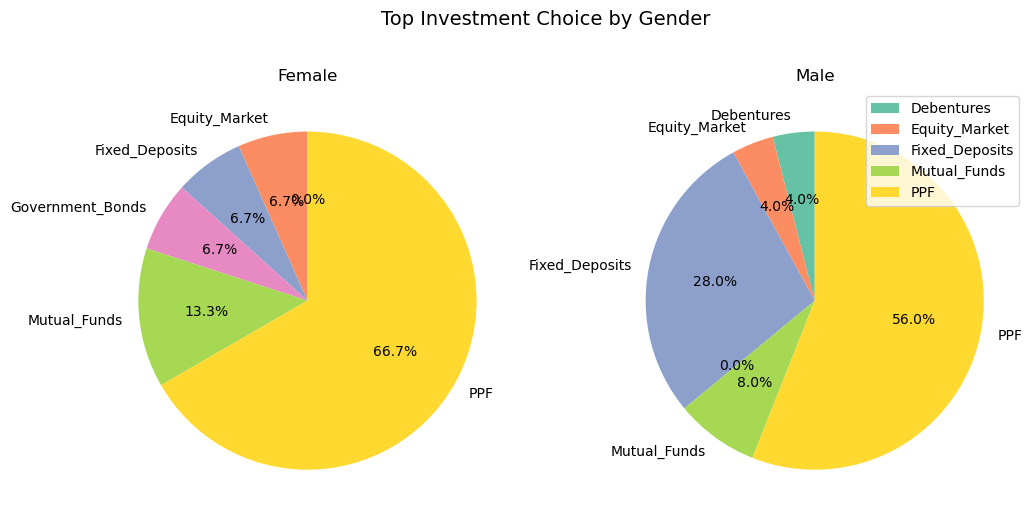

In [22]:
fig, axes = plt.subplots(1, len(choice_gender.index), figsize=(12,6))

for i, gender in enumerate(choice_gender.index):
    choice_gender.loc[gender].plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        ax=axes[i],
        colors=sns.color_palette("Set2")
    )
    axes[i].set_title(f"{gender}")
    axes[i].set_ylabel("")
plt.legend()
plt.suptitle("Top Investment Choice by Gender", fontsize=14)
plt.savefig('Top Investment Choice by Gender 2')
plt.show()


Top_Choice  Debentures  Equity_Market  Fixed_Deposits  Government_Bonds  \
AGE_GROUP                                                                 
18-25                0              2               1                 1   
26-35                1              0               7                 0   

Top_Choice  Mutual_Funds  PPF  
AGE_GROUP                      
18-25                  1    5  
26-35                  3   19  


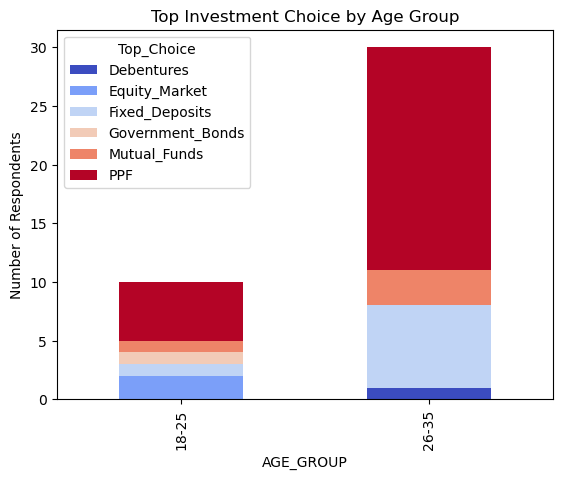

In [23]:
choice_age = pd.crosstab(df['AGE_GROUP'], df['Top_Choice'])
print(choice_age)

choice_age.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Top Investment Choice by Age Group")
plt.ylabel("Number of Respondents")
plt.savefig('Top Investment Choice by Age Group')
plt.show()


In [24]:
# Count frequency of top choices
top_choice_counts = df['Top_Choice'].value_counts().nlargest(3)
print(top_choice_counts)


Top_Choice
PPF               24
Fixed_Deposits     8
Mutual_Funds       4
Name: count, dtype: int64


C:\Users\abuba\AppData\Local\Temp\ipykernel_35688\2116406245.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_choice_counts.index, x=top_choice_counts.values, palette="viridis")


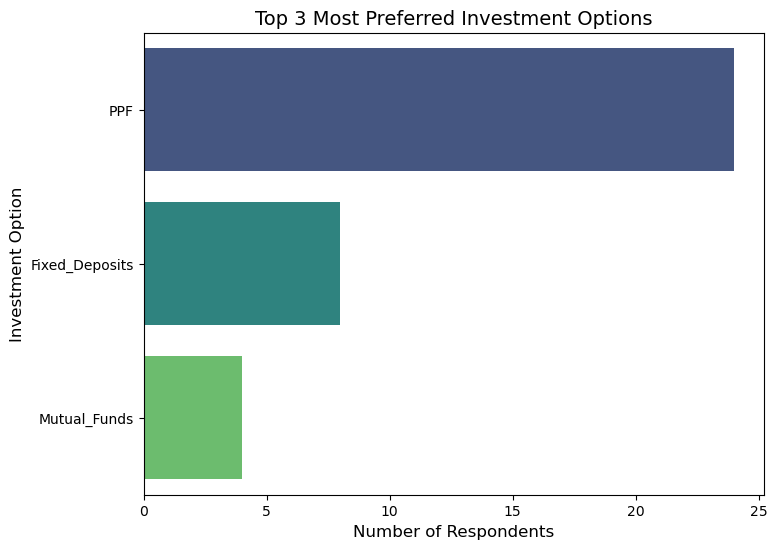

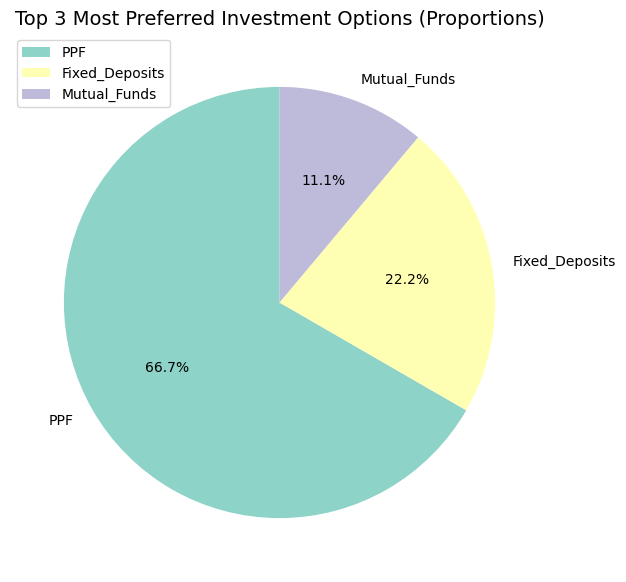

Top_Choice  Fixed_Deposits  Mutual_Funds  PPF
gender                                       
Female                   1             2   10
Male                     7             2   14


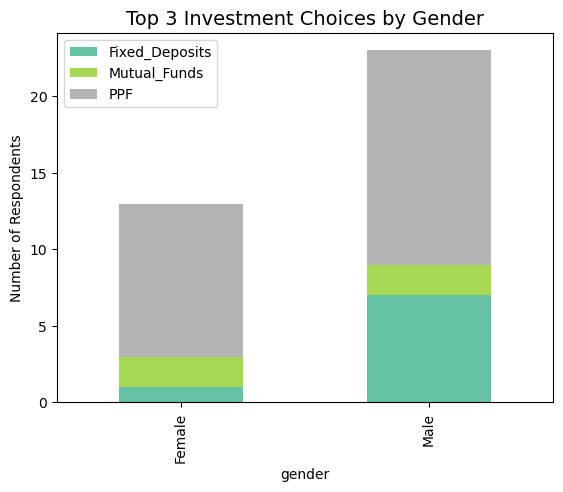

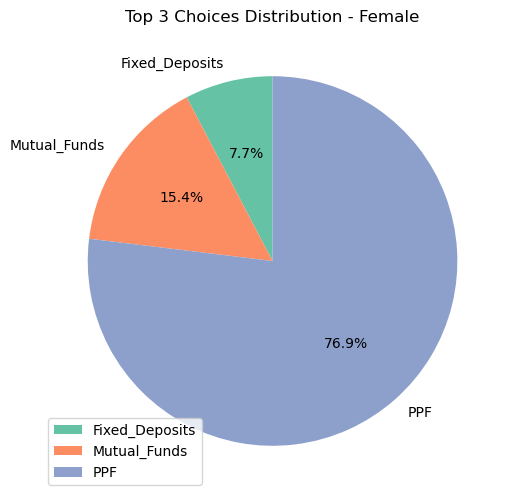

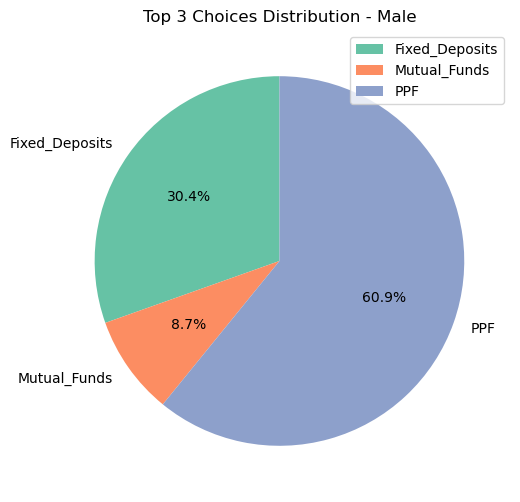

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(y=top_choice_counts.index, x=top_choice_counts.values, palette="viridis")
plt.title("Top 3 Most Preferred Investment Options", fontsize=14)
plt.xlabel("Number of Respondents", fontsize=12)
plt.ylabel("Investment Option", fontsize=12)
plt.savefig('Top 3 Most Preferred Investment Options')
plt.show()


plt.figure(figsize=(7,7))
top_choice_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set3")
)
plt.title("Top 3 Most Preferred Investment Options (Proportions)", fontsize=14)
plt.legend()
plt.ylabel("")
plt.savefig('Top 3 Most Preferred Investment Options Proportions')
plt.show()



# Filter only rows where Top_Choice is in the top 3
df_top3 = df[df['Top_Choice'].isin(top_choice_counts.index)]

choice_gender_top3 = pd.crosstab(df_top3['gender'], df_top3['Top_Choice'])
print(choice_gender_top3)

# Bar chart (stacked)
choice_gender_top3.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Top 3 Investment Choices by Gender", fontsize=14)
plt.ylabel("Number of Respondents")
plt.legend()
plt.savefig('Top 3 Investment Choices by Gender')
plt.show()


for gender in choice_gender_top3.index:
    plt.figure(figsize=(6,6))
    choice_gender_top3.loc[gender].plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("Set2")
    )
    plt.title(f"Top 3 Choices Distribution - {gender}")
    plt.ylabel("")
    plt.legend()
    plt.show()


### Description of Top 3 Investment Options

**1. Public Provident Fund (PPF):**
- PPF is a government-backed, long-term savings scheme in India.
- It offers attractive interest rates and tax benefits under Section 80C.
- The investment has a lock-in period of 15 years, making it suitable for long-term financial goals like retirement.
- Returns are guaranteed and risk-free, making it a popular choice for conservative investors.

**2. Fixed Deposits (FDs):**
- Fixed Deposits are offered by banks and financial institutions.
- Investors deposit a lump sum for a fixed tenure at a predetermined interest rate.
- FDs are low-risk and provide assured returns, but the interest is taxable.
- They are highly liquid, allowing premature withdrawal with a penalty.

**3. Mutual Funds:**
- Mutual funds pool money from multiple investors to invest in stocks, bonds, or other securities.
- They are managed by professional fund managers.
- Mutual funds offer diversification, liquidity, and the potential for higher returns compared to traditional savings.
- The risk and return depend on the type of fund (equity, debt, hybrid, etc.).

### Which Option is More Profitable for a Bank?

From a bank's perspective, the profitability of these investment options differs:

- **Fixed Deposits (FDs):**
  - Most profitable for banks among the three.
  - Banks use the money deposited in FDs to lend at higher interest rates (loans, credit cards, etc.), earning a spread between the FD rate and lending rate.
  - FDs are a major source of low-cost, stable funding for banks.

- **Public Provident Fund (PPF):**
  - Least profitable for banks.
  - PPF is a government scheme; banks act only as intermediaries and do not earn significant profits from PPF accounts. The government pays the interest, and banks may get a small service fee.

- **Mutual Funds:**
  - Banks may earn some revenue if they distribute mutual funds (as agents), but the main profits go to asset management companies, not the bank itself.
  - If the bank owns an asset management arm, it can profit from management fees.

**Summary:**
- Fixed Deposits are the most profitable for banks, as they directly use these funds for lending and earn interest spreads.

In [27]:
# Inspect the relevant columns
df[['Objective', 'Factor']].head()

,Objective,Factor
0,Capital Appreciation,Returns
1,Capital Appreciation,Locking Period
2,Capital Appreciation,Returns
3,Income,Returns
4,Income,Returns


C:\Users\abuba\AppData\Local\Temp\ipykernel_35688\3251499609.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=factor_counts.values, y=factor_counts.index, palette='viridis')


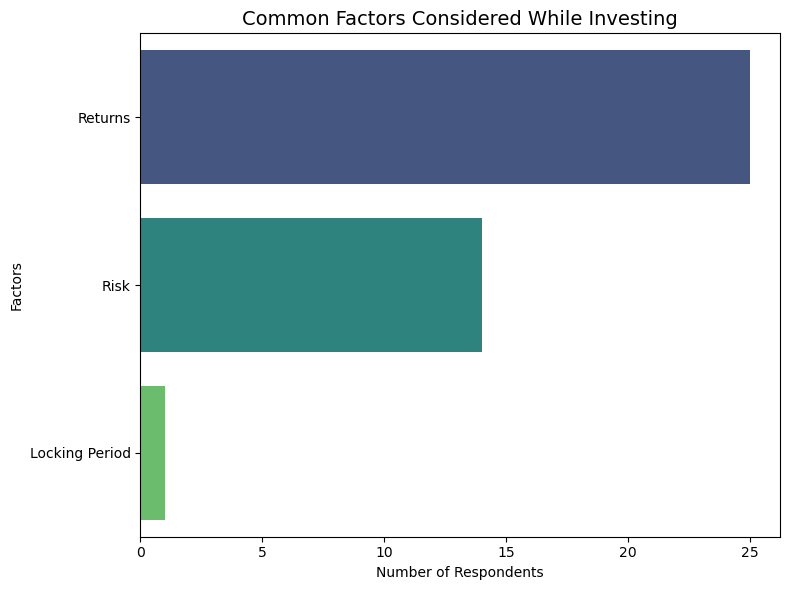

In [29]:
# For factors
all_factors = df['Factor'].dropna().str.split(',').explode().str.strip()
factor_counts = all_factors.value_counts()

# For objectives
all_objectives = df['Objective'].dropna().str.split(',').explode().str.strip()
objective_counts = all_objectives.value_counts()
  # Plot: Horizontal bar chart
plt.figure(figsize=(8,6))
sns.barplot(x=factor_counts.values, y=factor_counts.index, palette='viridis')
plt.title('Common Factors Considered While Investing', fontsize=14)
plt.xlabel('Number of Respondents')
plt.ylabel('Factors')
plt.tight_layout()
plt.show()

C:\Users\abuba\AppData\Local\Temp\ipykernel_35688\1352772126.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=objective_counts.values, y=objective_counts.index, palette='magma')


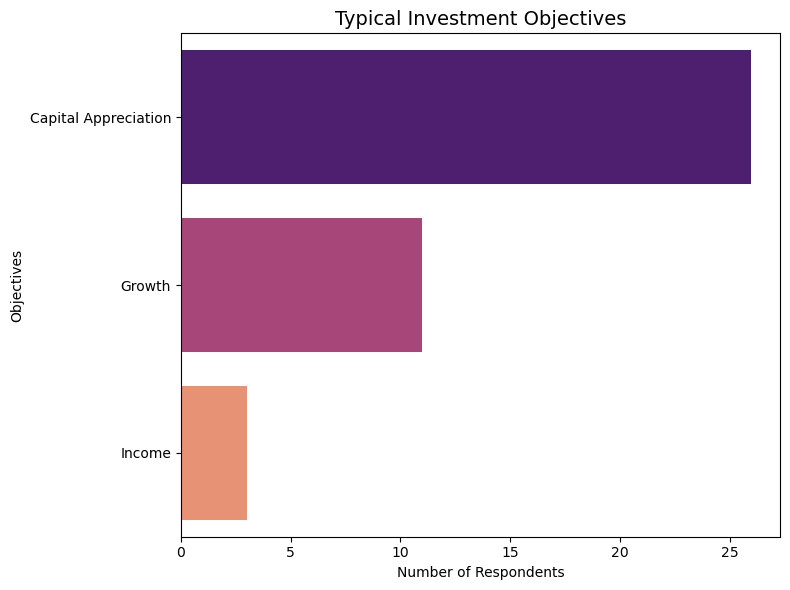

In [30]:

# Plot: Horizontal bar chart
plt.figure(figsize=(8,6))
sns.barplot(x=objective_counts.values, y=objective_counts.index, palette='magma')
plt.title('Typical Investment Objectives', fontsize=14)
plt.xlabel('Number of Respondents')
plt.ylabel('Objectives')
plt.tight_layout()
plt.show()

In [32]:
pd.crosstab(df['Factor'], df['gender'], normalize='columns') * 100

gender,Female,Male
Factor,,
Locking Period,6.666667,0.0
Returns,60.000000,64.0
Risk,33.333333,36.0


In [34]:
def prepare_demo_plot(df, column, demo_col):
    # Split multiple selections and explode
    exploded = df[[column, demo_col]].dropna()
    exploded = exploded.assign(**{column: exploded[column].str.split(',')})
    exploded = exploded.explode(column)
    exploded[column] = exploded[column].str.strip()
    
    # Count per demographic group
    demo_counts = exploded.groupby([demo_col, column]).size().reset_index(name='Count')
    return demo_counts


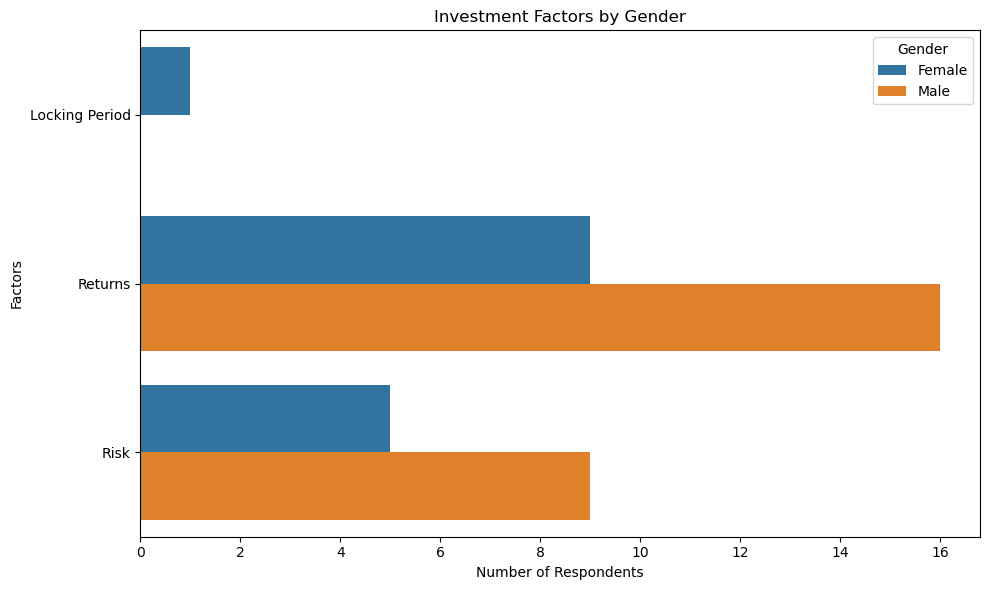

In [37]:
# ------------------------------
# Plot 1: Factors by Gender
# ------------------------------
factor_gender = prepare_demo_plot(df, 'Factor', 'gender')
plt.figure(figsize=(10,6))
sns.barplot(data=factor_gender, x='Count', y='Factor', hue='gender')
plt.title('Investment Factors by Gender')
plt.xlabel('Number of Respondents')
plt.ylabel('Factors')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

C:\Users\abuba\AppData\Local\Temp\ipykernel_35688\2625431416.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demo_counts = exploded.groupby([demo_col, column]).size().reset_index(name='Count')


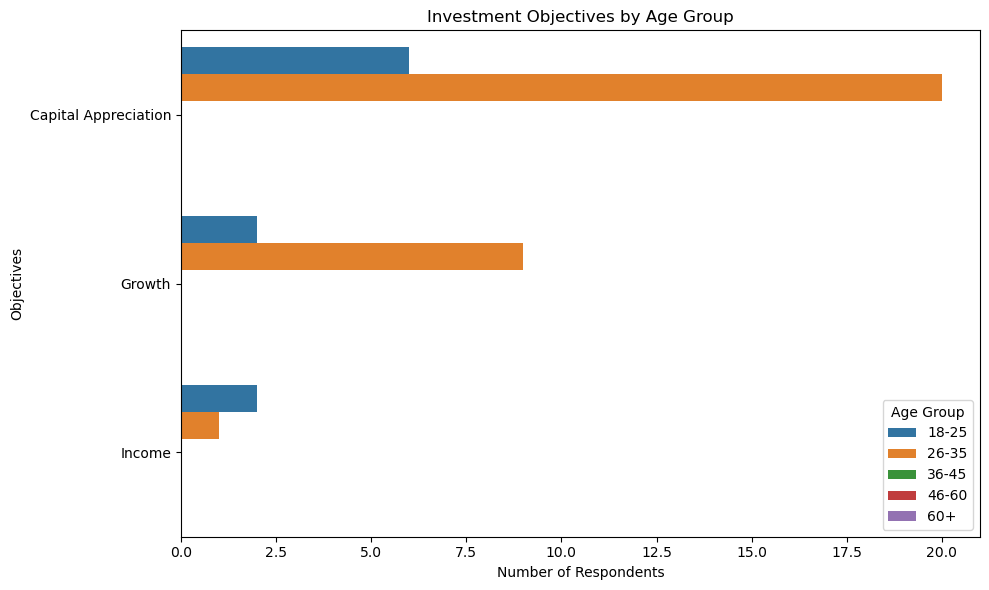

In [40]:
# ------------------------------
# Plot 2: Objectives by Age_Group
# ------------------------------
objective_age = prepare_demo_plot(df, 'Objective', 'AGE_GROUP')
plt.figure(figsize=(10,6))
sns.barplot(data=objective_age, x='Count', y='Objective', hue='AGE_GROUP')
plt.title('Investment Objectives by Age Group')
plt.xlabel('Number of Respondents')
plt.ylabel('Objectives')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

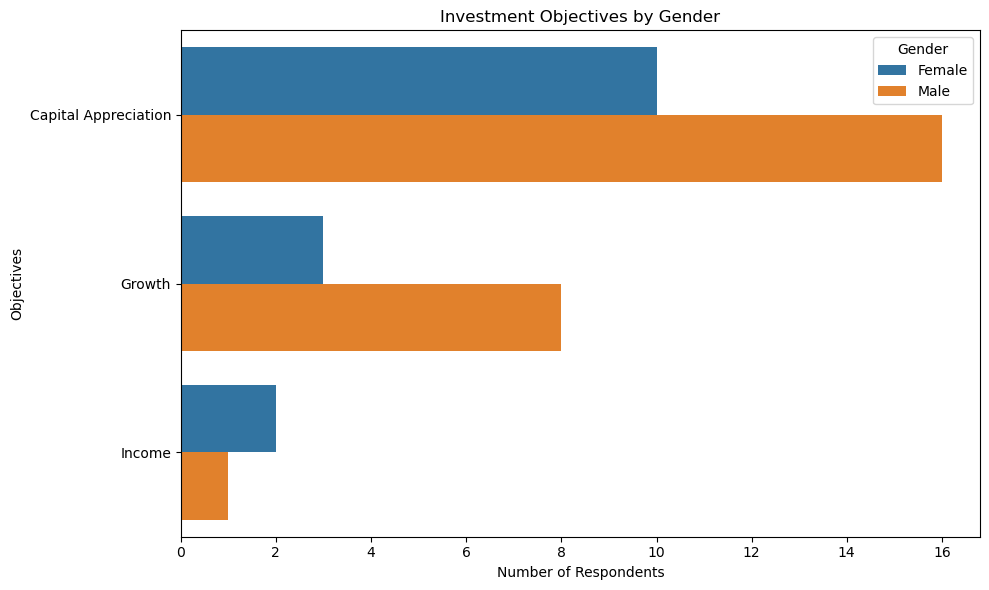

In [50]:
objective_gender = prepare_demo_plot(df, 'Objective', 'gender')
plt.figure(figsize=(10,6))
sns.barplot(data=objective_gender, x='Count', y='Objective', hue='gender')
plt.title('Investment Objectives by Gender')
plt.xlabel('Number of Respondents')
plt.ylabel('Objectives')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

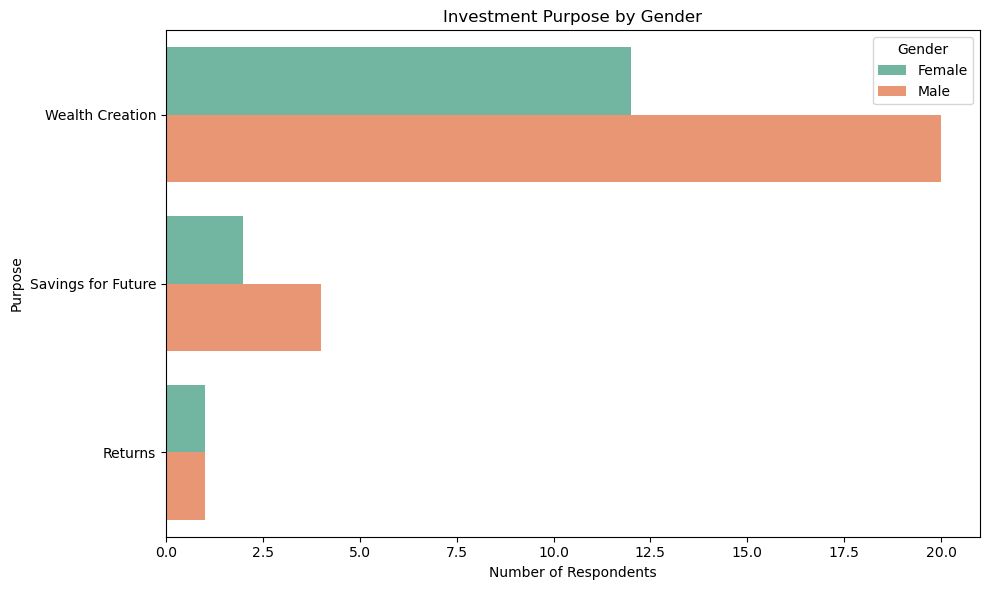

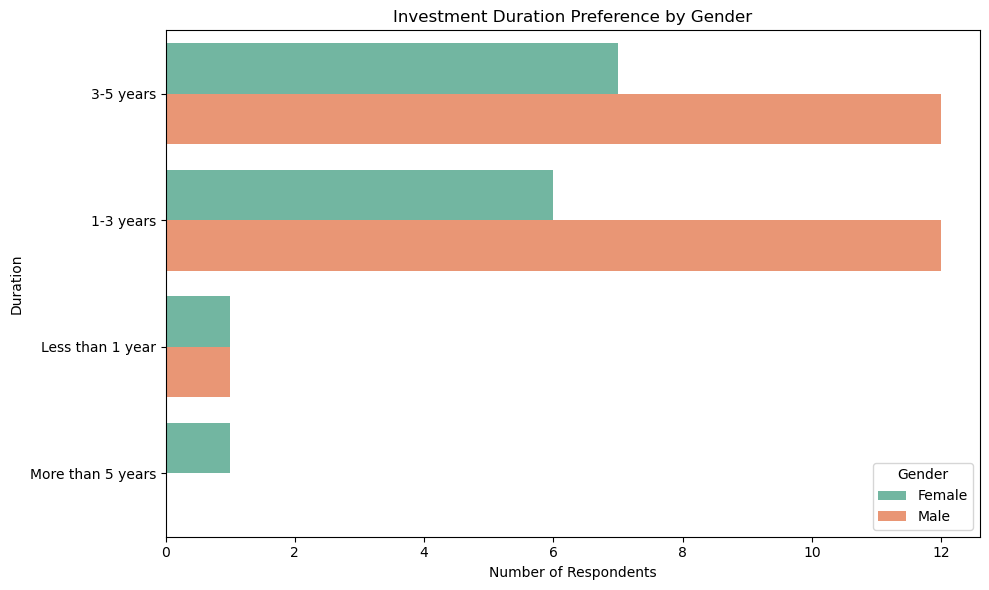

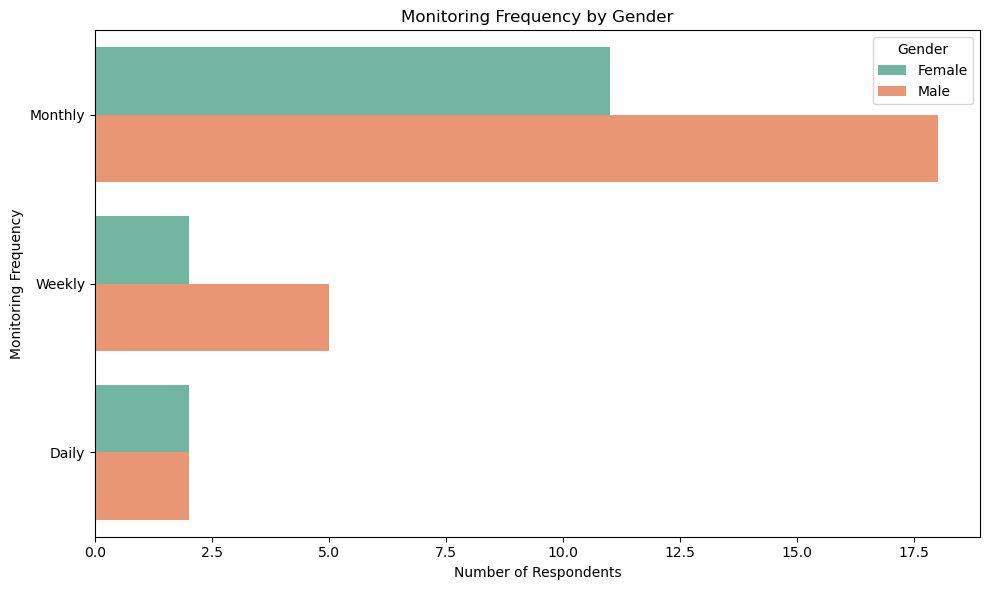

C:\Users\abuba\AppData\Local\Temp\ipykernel_35688\1682125714.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=expect_df, x='Expect', y='gender', palette='Set2')


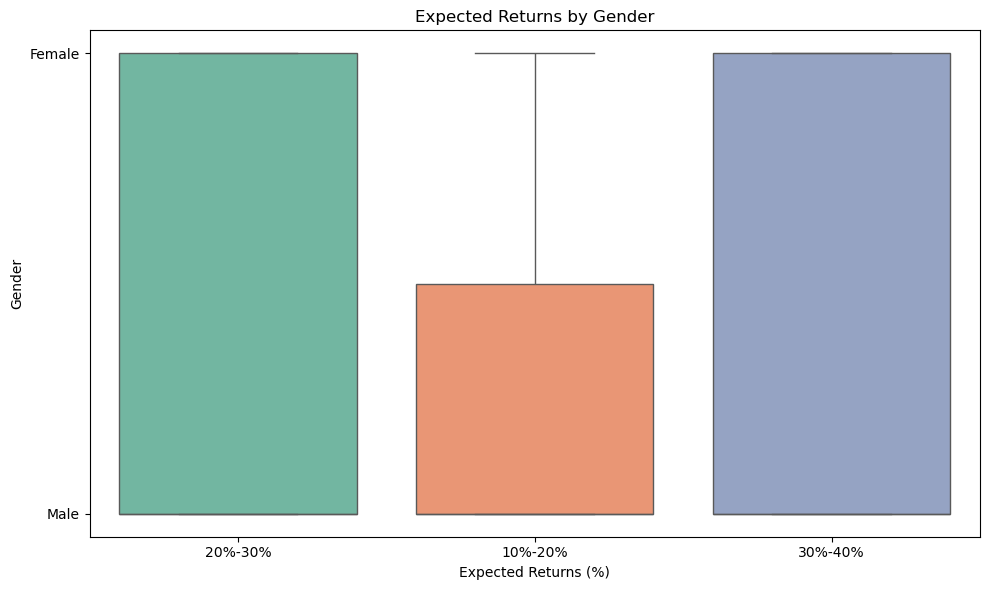

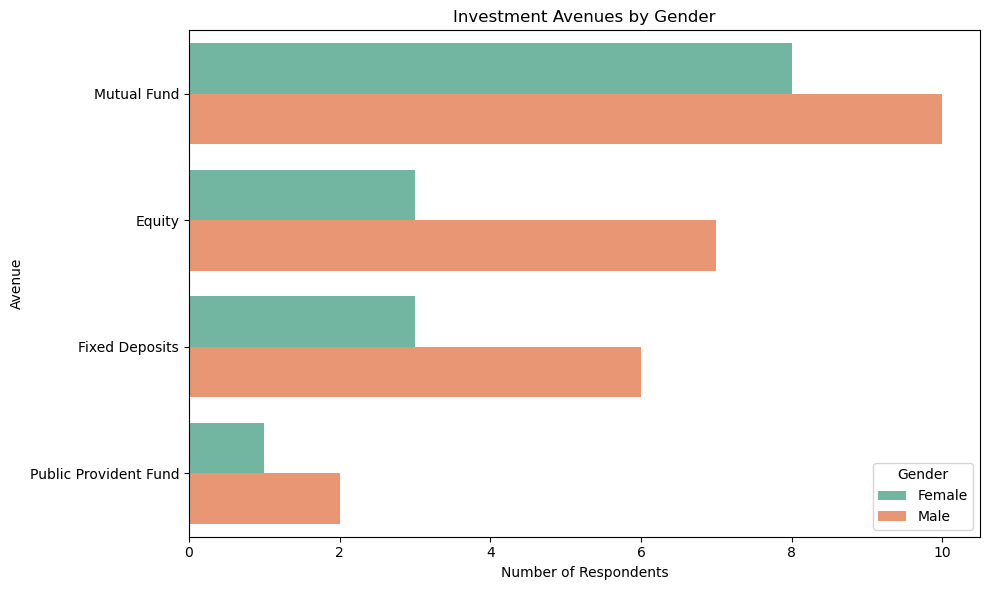

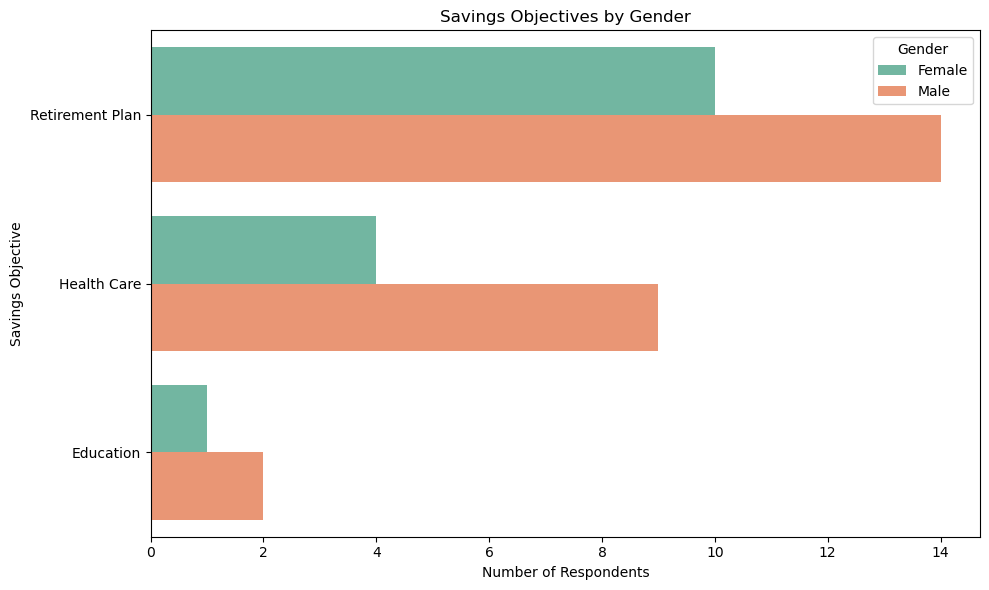

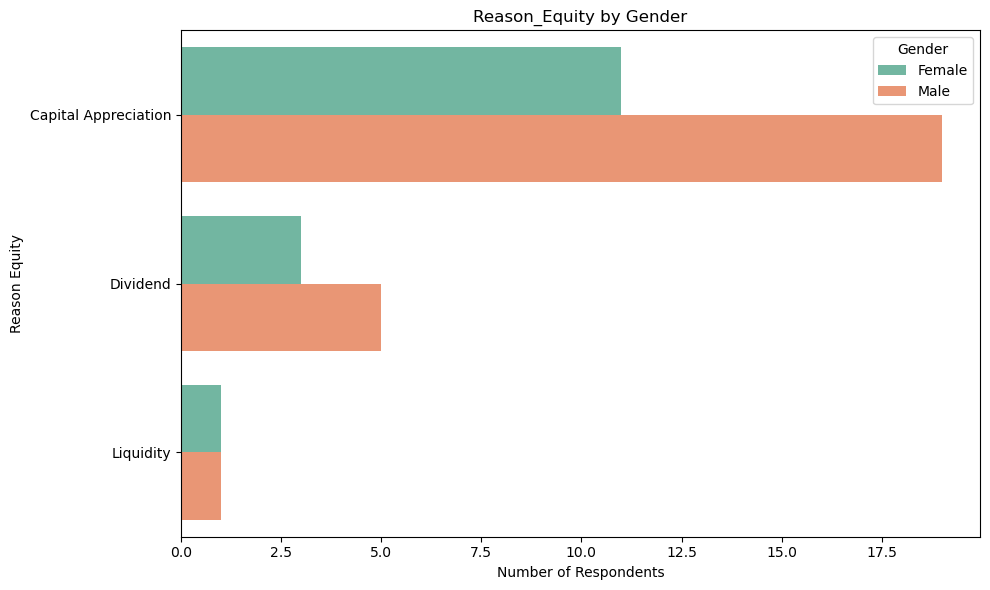

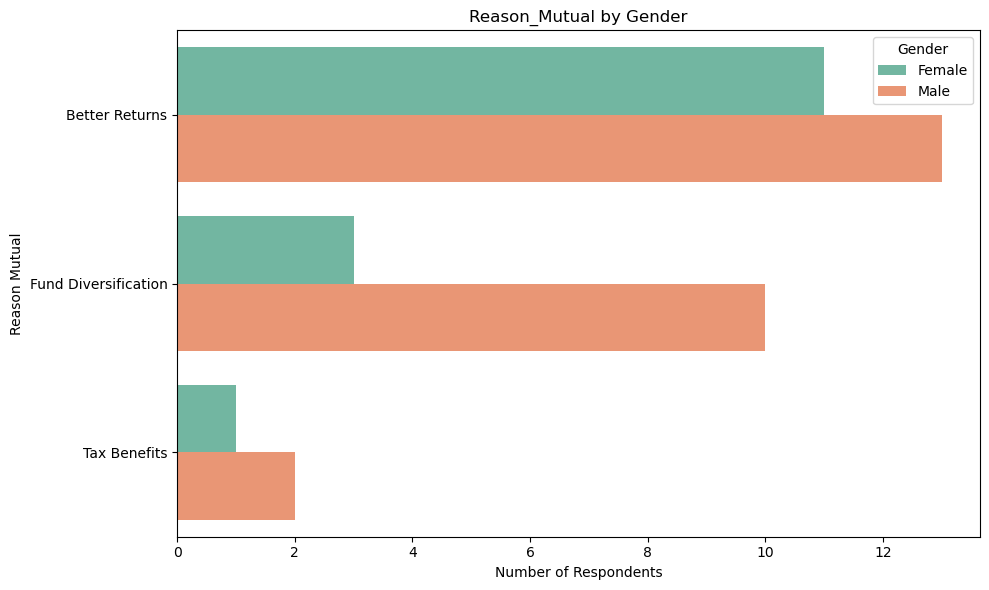

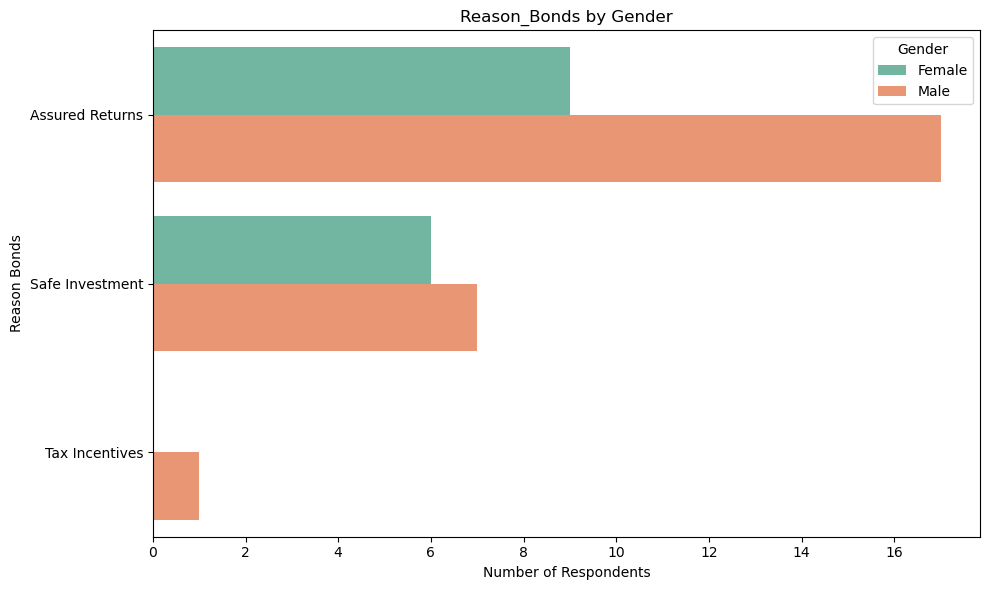

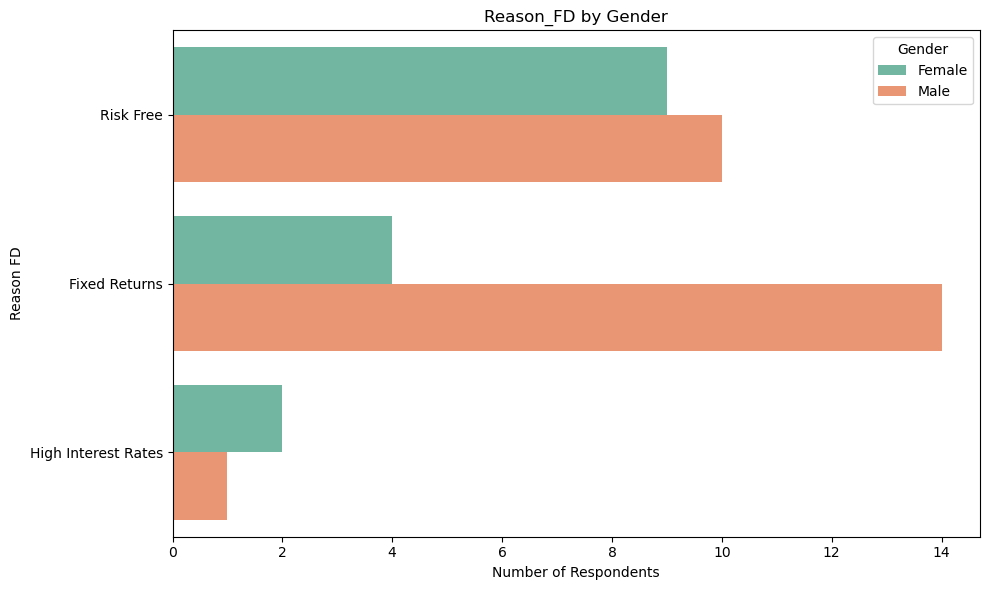

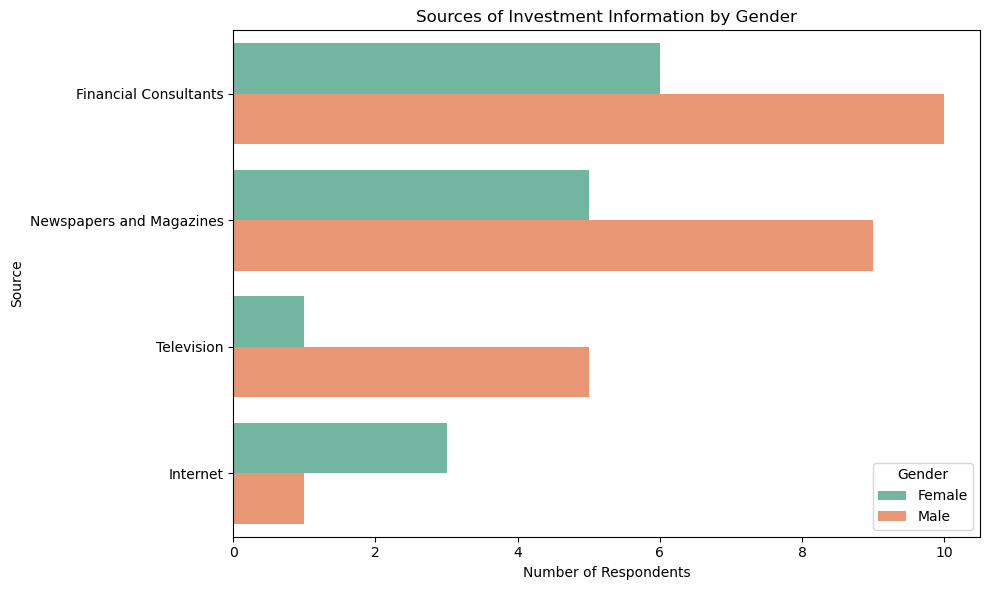

In [61]:

# Optional: create Age_Group if not already present
bins = [18, 25, 35, 45, 60, 100]
labels = ['18-25', '26-35', '36-45', '46-60', '60+']
if 'AGE_GROUP' not in df.columns:
    df['AGE_GROUP'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# ------------------------------
# Function to prepare multi-selection columns
# ------------------------------
def explode_column(df, col_name):
    temp = df[['gender', 'AGE_GROUP', col_name]].dropna()
    temp = temp.assign(**{col_name: temp[col_name].str.split(',')})
    temp = temp.explode(col_name)
    temp[col_name] = temp[col_name].str.strip()
    return temp

# ------------------------------
# 1. Purpose Analysis
# ------------------------------
purpose_df = explode_column(df,'Purpose')
plt.figure(figsize=(10,6))
sns.countplot(data=purpose_df, y='Purpose', hue='gender', palette='Set2', order=purpose_df['Purpose'].value_counts().index)
plt.title('Investment Purpose by Gender')
plt.xlabel('Number of Respondents')
plt.ylabel('Purpose')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# ------------------------------
# 2. Duration Preferences
# ------------------------------
duration_df = explode_column(df, 'Duration')
plt.figure(figsize=(10,6))
sns.countplot(data=duration_df, y='Duration', hue='gender', palette='Set2', order=duration_df['Duration'].value_counts().index)
plt.title('Investment Duration Preference by Gender')
plt.xlabel('Number of Respondents')
plt.ylabel('Duration')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# ------------------------------
# 3. Monitoring Frequency
# ------------------------------
monitor_df = explode_column(df, 'Invest_Monitor')
plt.figure(figsize=(10,6))
sns.countplot(data=monitor_df, y='Invest_Monitor', hue='gender', palette='Set2', order=monitor_df['Invest_Monitor'].value_counts().index)
plt.title('Monitoring Frequency by Gender')
plt.xlabel('Number of Respondents')
plt.ylabel('Monitoring Frequency')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# ------------------------------
# 4. Expected Returns
# ------------------------------
expect_df = df[['Expect', 'gender']].dropna()
plt.figure(figsize=(10,6))
sns.boxplot(data=expect_df, x='Expect', y='gender', palette='Set2')
plt.title('Expected Returns by Gender')
plt.xlabel('Expected Returns (%)')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()

# ------------------------------
# 5. Investment Avenue
# ------------------------------
avenue_df = explode_column(df, 'Avenue')
plt.figure(figsize=(10,6))
sns.countplot(data=avenue_df, y='Avenue', hue='gender', palette='Set2', order=avenue_df['Avenue'].value_counts().index)
plt.title('Investment Avenues by Gender')
plt.xlabel('Number of Respondents')
plt.ylabel('Avenue')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# ------------------------------
# 6. Savings Objectives
# ------------------------------
savings_df = explode_column(df, 'What are your savings objectives?')
plt.figure(figsize=(10,6))
sns.countplot(data=savings_df, y='What are your savings objectives?', hue='gender', palette='Set2', order=savings_df['What are your savings objectives?'].value_counts().index)
plt.title('Savings Objectives by Gender')
plt.xlabel('Number of Respondents')
plt.ylabel('Savings Objective')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# ------------------------------
# 7. Reasons for Each Investment Type
# ------------------------------
for reason_col in ['Reason_Equity', 'Reason_Mutual', 'Reason_Bonds', 'Reason_FD']:
    reason_df = explode_column(df, reason_col)
    plt.figure(figsize=(10,6))
    sns.countplot(data=reason_df, y=reason_col, hue='gender', palette='Set2', order=reason_df[reason_col].value_counts().index)
    plt.title(f'{reason_col} by Gender')
    plt.xlabel('Number of Respondents')
    plt.ylabel(reason_col.replace('_',' '))
    plt.legend(title='Gender')
    plt.tight_layout()
    plt.show()

# ------------------------------
# 8. Sources of Information
# ------------------------------
source_df = explode_column(df, 'Source')
plt.figure(figsize=(10,6))
sns.countplot(data=source_df, y='Source', hue='gender', palette='Set2', order=source_df['Source'].value_counts().index)
plt.title('Sources of Investment Information by Gender')
plt.xlabel('Number of Respondents')
plt.ylabel('Source')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()